In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
import category_encoders as ce


In [2]:
dataset=pd.read_csv("The_Volcanoes_Of_Earth.csv")
dataset.head()

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km
0,Abu,https://volcano.si.edu/gallery/photos/GVP-0895...,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,"641 m, 2103 ft",34.5°N,131.6°E,3597.0,9594.0,117805.0,4071152.0
1,Acamarachi,https://volcano.si.edu/gallery/photos/GVP-0688...,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,"6023 m, 19760 ft",23.292°S,67.618°W,0.0,7.0,294.0,9092.0
2,Acatenango,https://volcano.si.edu/gallery/photos/GVP-0788...,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,"3976 m, 13045 ft",14.501°N,90.876°W,4329.0,60730.0,1042836.0,7634778.0
3,Acigol-Nevsehir,https://volcano.si.edu/includes/images/noimage...,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,"1683 m, 5522 ft",38.537°N,34.621°E,127863.0,127863.0,218469.0,2253483.0
4,Adams,https://volcano.si.edu/gallery/photos/GVP-0281...,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,"3742 m, 12277 ft",46.206°N,121.49°W,0.0,70.0,4019.0,393303.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Volcano_Name             2662 non-null   object 
 1   Volcano_Image            2661 non-null   object 
 2   Volcano_Type             2662 non-null   object 
 3   Country                  2661 non-null   object 
 4   Region                   2661 non-null   object 
 5   Subregion                2662 non-null   object 
 6   epoch_period             2662 non-null   object 
 7   Last_Eruption            2661 non-null   object 
 8   Summit_and_Elevatiuon    2661 non-null   object 
 9   Latitude                 2661 non-null   object 
 10  Longitude                2661 non-null   object 
 11  population_within_5km    1467 non-null   float64
 12  population_within_10km   1467 non-null   float64
 13  population_within_30km   1467 non-null   float64
 14  population_within_100km 

In [4]:
dataset.describe()

,population_within_5km,population_within_10km,population_within_30km,population_within_100km
count,1.467000e+03,1.467000e+03,1.467000e+03,1.467000e+03
mean,3.837469e+04,5.076723e+04,2.488235e+05,2.219448e+06
std,2.639145e+05,2.686133e+05,6.589186e+05,5.068638e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,9.950000e+01,5.354000e+03
50%,1.360000e+02,6.160000e+02,7.073000e+03,1.668880e+05
75%,2.413500e+03,1.298900e+04,1.685655e+05,2.100902e+06
max,5.783287e+06,5.783287e+06,7.073814e+06,4.064010e+07


In [5]:
dataset.isnull().sum()

Volcano_Name                  0
Volcano_Image                 1
Volcano_Type                  0
Country                       1
Region                        1
Subregion                     0
epoch_period                  0
Last_Eruption                 1
Summit_and_Elevatiuon         1
Latitude                      1
Longitude                     1
population_within_5km      1195
population_within_10km     1195
population_within_30km     1195
population_within_100km    1195
dtype: int64

<AxesSubplot:>

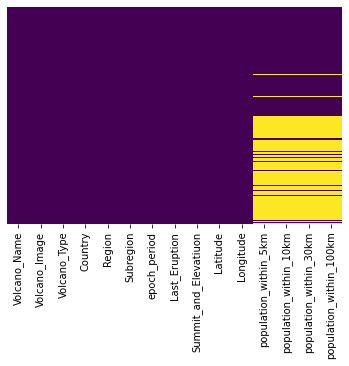

In [6]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [7]:
categoricaldata=[]
for i in dataset.columns:
    if dataset[i].dtypes=="object":
        categoricaldata.append(i)
categoricaldata    

['Volcano_Name',
 'Volcano_Image',
 'Volcano_Type',
 'Country',
 'Region',
 'Subregion',
 'epoch_period',
 'Last_Eruption',
 'Summit_and_Elevatiuon',
 'Latitude',
 'Longitude']

In [8]:
numericaldata=[]
for i in dataset.columns:
    if dataset[i].dtypes!="object":
        numericaldata.append(i)
numericaldata   

['population_within_5km',
 'population_within_10km',
 'population_within_30km',
 'population_within_100km']

In [9]:
dataset[["Latitude","mark1"]]=dataset["Latitude"].str.split("°",expand=True)
dataset

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km,mark1
0,Abu,https://volcano.si.edu/gallery/photos/GVP-0895...,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,"641 m, 2103 ft",34.5,131.6°E,3597.0,9594.0,117805.0,4071152.0,N
1,Acamarachi,https://volcano.si.edu/gallery/photos/GVP-0688...,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,"6023 m, 19760 ft",23.292,67.618°W,0.0,7.0,294.0,9092.0,S
2,Acatenango,https://volcano.si.edu/gallery/photos/GVP-0788...,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,"3976 m, 13045 ft",14.501,90.876°W,4329.0,60730.0,1042836.0,7634778.0,N
3,Acigol-Nevsehir,https://volcano.si.edu/includes/images/noimage...,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,"1683 m, 5522 ft",38.537,34.621°E,127863.0,127863.0,218469.0,2253483.0,N
4,Adams,https://volcano.si.edu/gallery/photos/GVP-0281...,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,"3742 m, 12277 ft",46.206,121.49°W,0.0,70.0,4019.0,393303.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,Zarechny,https://volcano.si.edu/includes/images/noimage...,Caldera(s),Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"760 m, 2493 ft",56.38,160.83°E,NaN,NaN,NaN,NaN,N
2658,Zenikame,https://volcano.si.edu/includes/images/noimage...,Submarine,Japan,Volcanic Region,Hokkaido,pleistocene,Pleistocene,"-30 m, -98 ft",41.737,140.855°E,NaN,NaN,NaN,NaN,N
2659,Zheltiy,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"792 m, 2598 ft",51.93,157.6°E,NaN,NaN,NaN,NaN,N
2660,Zhupanovskiye Vostriyaky,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"1684 m, 5525 ft",53.8,159.28°E,NaN,NaN,NaN,NaN,N


In [10]:
d1=dataset.copy()
d1

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km,mark1
0,Abu,https://volcano.si.edu/gallery/photos/GVP-0895...,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,"641 m, 2103 ft",34.5,131.6°E,3597.0,9594.0,117805.0,4071152.0,N
1,Acamarachi,https://volcano.si.edu/gallery/photos/GVP-0688...,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,"6023 m, 19760 ft",23.292,67.618°W,0.0,7.0,294.0,9092.0,S
2,Acatenango,https://volcano.si.edu/gallery/photos/GVP-0788...,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,"3976 m, 13045 ft",14.501,90.876°W,4329.0,60730.0,1042836.0,7634778.0,N
3,Acigol-Nevsehir,https://volcano.si.edu/includes/images/noimage...,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,"1683 m, 5522 ft",38.537,34.621°E,127863.0,127863.0,218469.0,2253483.0,N
4,Adams,https://volcano.si.edu/gallery/photos/GVP-0281...,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,"3742 m, 12277 ft",46.206,121.49°W,0.0,70.0,4019.0,393303.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,Zarechny,https://volcano.si.edu/includes/images/noimage...,Caldera(s),Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"760 m, 2493 ft",56.38,160.83°E,NaN,NaN,NaN,NaN,N
2658,Zenikame,https://volcano.si.edu/includes/images/noimage...,Submarine,Japan,Volcanic Region,Hokkaido,pleistocene,Pleistocene,"-30 m, -98 ft",41.737,140.855°E,NaN,NaN,NaN,NaN,N
2659,Zheltiy,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"792 m, 2598 ft",51.93,157.6°E,NaN,NaN,NaN,NaN,N
2660,Zhupanovskiye Vostriyaky,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"1684 m, 5525 ft",53.8,159.28°E,NaN,NaN,NaN,NaN,N


In [11]:
d1[["Longitude","mark1"]]=d1["Longitude"].str.split("°",expand=True)
d1

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km,mark1
0,Abu,https://volcano.si.edu/gallery/photos/GVP-0895...,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,"641 m, 2103 ft",34.5,131.6,3597.0,9594.0,117805.0,4071152.0,E
1,Acamarachi,https://volcano.si.edu/gallery/photos/GVP-0688...,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,"6023 m, 19760 ft",23.292,67.618,0.0,7.0,294.0,9092.0,W
2,Acatenango,https://volcano.si.edu/gallery/photos/GVP-0788...,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,"3976 m, 13045 ft",14.501,90.876,4329.0,60730.0,1042836.0,7634778.0,W
3,Acigol-Nevsehir,https://volcano.si.edu/includes/images/noimage...,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,"1683 m, 5522 ft",38.537,34.621,127863.0,127863.0,218469.0,2253483.0,E
4,Adams,https://volcano.si.edu/gallery/photos/GVP-0281...,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,"3742 m, 12277 ft",46.206,121.49,0.0,70.0,4019.0,393303.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,Zarechny,https://volcano.si.edu/includes/images/noimage...,Caldera(s),Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"760 m, 2493 ft",56.38,160.83,NaN,NaN,NaN,NaN,E
2658,Zenikame,https://volcano.si.edu/includes/images/noimage...,Submarine,Japan,Volcanic Region,Hokkaido,pleistocene,Pleistocene,"-30 m, -98 ft",41.737,140.855,NaN,NaN,NaN,NaN,E
2659,Zheltiy,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"792 m, 2598 ft",51.93,157.6,NaN,NaN,NaN,NaN,E
2660,Zhupanovskiye Vostriyaky,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"1684 m, 5525 ft",53.8,159.28,NaN,NaN,NaN,NaN,E


In [12]:
d2=d1.drop("mark1",axis=1)
d2

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km
0,Abu,https://volcano.si.edu/gallery/photos/GVP-0895...,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,"641 m, 2103 ft",34.5,131.6,3597.0,9594.0,117805.0,4071152.0
1,Acamarachi,https://volcano.si.edu/gallery/photos/GVP-0688...,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,"6023 m, 19760 ft",23.292,67.618,0.0,7.0,294.0,9092.0
2,Acatenango,https://volcano.si.edu/gallery/photos/GVP-0788...,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,"3976 m, 13045 ft",14.501,90.876,4329.0,60730.0,1042836.0,7634778.0
3,Acigol-Nevsehir,https://volcano.si.edu/includes/images/noimage...,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,"1683 m, 5522 ft",38.537,34.621,127863.0,127863.0,218469.0,2253483.0
4,Adams,https://volcano.si.edu/gallery/photos/GVP-0281...,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,"3742 m, 12277 ft",46.206,121.49,0.0,70.0,4019.0,393303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,Zarechny,https://volcano.si.edu/includes/images/noimage...,Caldera(s),Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"760 m, 2493 ft",56.38,160.83,NaN,NaN,NaN,NaN
2658,Zenikame,https://volcano.si.edu/includes/images/noimage...,Submarine,Japan,Volcanic Region,Hokkaido,pleistocene,Pleistocene,"-30 m, -98 ft",41.737,140.855,NaN,NaN,NaN,NaN
2659,Zheltiy,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"792 m, 2598 ft",51.93,157.6,NaN,NaN,NaN,NaN
2660,Zhupanovskiye Vostriyaky,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"1684 m, 5525 ft",53.8,159.28,NaN,NaN,NaN,NaN


In [13]:
newnumericaldata=[]
for i in d2.columns:
    if d2[i].dtypes!="object":
        newnumericaldata.append(i)
newnumericaldata 

['population_within_5km',
 'population_within_10km',
 'population_within_30km',
 'population_within_100km']

In [14]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Volcano_Name             2662 non-null   object 
 1   Volcano_Image            2661 non-null   object 
 2   Volcano_Type             2662 non-null   object 
 3   Country                  2661 non-null   object 
 4   Region                   2661 non-null   object 
 5   Subregion                2662 non-null   object 
 6   epoch_period             2662 non-null   object 
 7   Last_Eruption            2661 non-null   object 
 8   Summit_and_Elevatiuon    2661 non-null   object 
 9   Latitude                 2661 non-null   object 
 10  Longitude                2661 non-null   object 
 11  population_within_5km    1467 non-null   float64
 12  population_within_10km   1467 non-null   float64
 13  population_within_30km   1467 non-null   float64
 14  population_within_100km 

In [15]:
d2[["Latitude","Longitude"]]=d2[["Latitude","Longitude"]].astype(float)


In [16]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Volcano_Name             2662 non-null   object 
 1   Volcano_Image            2661 non-null   object 
 2   Volcano_Type             2662 non-null   object 
 3   Country                  2661 non-null   object 
 4   Region                   2661 non-null   object 
 5   Subregion                2662 non-null   object 
 6   epoch_period             2662 non-null   object 
 7   Last_Eruption            2661 non-null   object 
 8   Summit_and_Elevatiuon    2661 non-null   object 
 9   Latitude                 2661 non-null   float64
 10  Longitude                2661 non-null   float64
 11  population_within_5km    1467 non-null   float64
 12  population_within_10km   1467 non-null   float64
 13  population_within_30km   1467 non-null   float64
 14  population_within_100km 

In [17]:
d3=d2.copy()
d3

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km
0,Abu,https://volcano.si.edu/gallery/photos/GVP-0895...,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,"641 m, 2103 ft",34.500,131.600,3597.0,9594.0,117805.0,4071152.0
1,Acamarachi,https://volcano.si.edu/gallery/photos/GVP-0688...,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,"6023 m, 19760 ft",23.292,67.618,0.0,7.0,294.0,9092.0
2,Acatenango,https://volcano.si.edu/gallery/photos/GVP-0788...,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,"3976 m, 13045 ft",14.501,90.876,4329.0,60730.0,1042836.0,7634778.0
3,Acigol-Nevsehir,https://volcano.si.edu/includes/images/noimage...,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,"1683 m, 5522 ft",38.537,34.621,127863.0,127863.0,218469.0,2253483.0
4,Adams,https://volcano.si.edu/gallery/photos/GVP-0281...,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,"3742 m, 12277 ft",46.206,121.490,0.0,70.0,4019.0,393303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,Zarechny,https://volcano.si.edu/includes/images/noimage...,Caldera(s),Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"760 m, 2493 ft",56.380,160.830,NaN,NaN,NaN,NaN
2658,Zenikame,https://volcano.si.edu/includes/images/noimage...,Submarine,Japan,Volcanic Region,Hokkaido,pleistocene,Pleistocene,"-30 m, -98 ft",41.737,140.855,NaN,NaN,NaN,NaN
2659,Zheltiy,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"792 m, 2598 ft",51.930,157.600,NaN,NaN,NaN,NaN
2660,Zhupanovskiye Vostriyaky,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"1684 m, 5525 ft",53.800,159.280,NaN,NaN,NaN,NaN


In [18]:
d3[["Summit","mark1"]]=d3["Summit_and_Elevatiuon"].str.split("m,",expand=True)


In [19]:
d4=d3.copy()

In [20]:
d4[["Elevatiuon","mark1"]]=d3["Summit_and_Elevatiuon"].str.split("ft",expand=True)
d4

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km,Summit,mark1,Elevatiuon
0,Abu,https://volcano.si.edu/gallery/photos/GVP-0895...,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,"641 m, 2103 ft",34.500,131.600,3597.0,9594.0,117805.0,4071152.0,641,,"641 m, 2103"
1,Acamarachi,https://volcano.si.edu/gallery/photos/GVP-0688...,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,"6023 m, 19760 ft",23.292,67.618,0.0,7.0,294.0,9092.0,6023,,"6023 m, 19760"
2,Acatenango,https://volcano.si.edu/gallery/photos/GVP-0788...,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,"3976 m, 13045 ft",14.501,90.876,4329.0,60730.0,1042836.0,7634778.0,3976,,"3976 m, 13045"
3,Acigol-Nevsehir,https://volcano.si.edu/includes/images/noimage...,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,"1683 m, 5522 ft",38.537,34.621,127863.0,127863.0,218469.0,2253483.0,1683,,"1683 m, 5522"
4,Adams,https://volcano.si.edu/gallery/photos/GVP-0281...,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,"3742 m, 12277 ft",46.206,121.490,0.0,70.0,4019.0,393303.0,3742,,"3742 m, 12277"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,Zarechny,https://volcano.si.edu/includes/images/noimage...,Caldera(s),Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"760 m, 2493 ft",56.380,160.830,NaN,NaN,NaN,NaN,760,,"760 m, 2493"
2658,Zenikame,https://volcano.si.edu/includes/images/noimage...,Submarine,Japan,Volcanic Region,Hokkaido,pleistocene,Pleistocene,"-30 m, -98 ft",41.737,140.855,NaN,NaN,NaN,NaN,-30,,"-30 m, -98"
2659,Zheltiy,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"792 m, 2598 ft",51.930,157.600,NaN,NaN,NaN,NaN,792,,"792 m, 2598"
2660,Zhupanovskiye Vostriyaky,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"1684 m, 5525 ft",53.800,159.280,NaN,NaN,NaN,NaN,1684,,"1684 m, 5525"


In [21]:
d5=d4.copy()

In [22]:
d5[["Elevatiuon2","m"]]=d5["Elevatiuon"].str.split("m,",expand=True)
d5

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km,Summit,mark1,Elevatiuon,Elevatiuon2,m
0,Abu,https://volcano.si.edu/gallery/photos/GVP-0895...,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,"641 m, 2103 ft",34.500,131.600,3597.0,9594.0,117805.0,4071152.0,641,,"641 m, 2103",641,2103
1,Acamarachi,https://volcano.si.edu/gallery/photos/GVP-0688...,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,"6023 m, 19760 ft",23.292,67.618,0.0,7.0,294.0,9092.0,6023,,"6023 m, 19760",6023,19760
2,Acatenango,https://volcano.si.edu/gallery/photos/GVP-0788...,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,"3976 m, 13045 ft",14.501,90.876,4329.0,60730.0,1042836.0,7634778.0,3976,,"3976 m, 13045",3976,13045
3,Acigol-Nevsehir,https://volcano.si.edu/includes/images/noimage...,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,"1683 m, 5522 ft",38.537,34.621,127863.0,127863.0,218469.0,2253483.0,1683,,"1683 m, 5522",1683,5522
4,Adams,https://volcano.si.edu/gallery/photos/GVP-0281...,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,"3742 m, 12277 ft",46.206,121.490,0.0,70.0,4019.0,393303.0,3742,,"3742 m, 12277",3742,12277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,Zarechny,https://volcano.si.edu/includes/images/noimage...,Caldera(s),Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"760 m, 2493 ft",56.380,160.830,NaN,NaN,NaN,NaN,760,,"760 m, 2493",760,2493
2658,Zenikame,https://volcano.si.edu/includes/images/noimage...,Submarine,Japan,Volcanic Region,Hokkaido,pleistocene,Pleistocene,"-30 m, -98 ft",41.737,140.855,NaN,NaN,NaN,NaN,-30,,"-30 m, -98",-30,-98
2659,Zheltiy,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"792 m, 2598 ft",51.930,157.600,NaN,NaN,NaN,NaN,792,,"792 m, 2598",792,2598
2660,Zhupanovskiye Vostriyaky,https://volcano.si.edu/includes/images/noimage...,Stratovolcano,Russia,Volcanic Region,Kamchatka Peninsula,pleistocene,Pleistocene,"1684 m, 5525 ft",53.800,159.280,NaN,NaN,NaN,NaN,1684,,"1684 m, 5525",1684,5525


In [23]:
d5.rename(columns = {'m':'Elevatiuon by feat', 'Summit':'Summit by meter'}, inplace = True)

In [24]:
d6=d5.drop(["Volcano_Image","Summit_and_Elevatiuon","mark1","Elevatiuon","Elevatiuon2"],axis=1)


In [25]:
d6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Volcano_Name             2662 non-null   object 
 1   Volcano_Type             2662 non-null   object 
 2   Country                  2661 non-null   object 
 3   Region                   2661 non-null   object 
 4   Subregion                2662 non-null   object 
 5   epoch_period             2662 non-null   object 
 6   Last_Eruption            2661 non-null   object 
 7   Latitude                 2661 non-null   float64
 8   Longitude                2661 non-null   float64
 9   population_within_5km    1467 non-null   float64
 10  population_within_10km   1467 non-null   float64
 11  population_within_30km   1467 non-null   float64
 12  population_within_100km  1467 non-null   float64
 13  Summit by meter          2661 non-null   object 
 14  Elevatiuon by feat      

In [35]:
d6["Summit by meter"]=d6["Summit by meter"].replace(['Unknown,  '],"0")

In [36]:
d6[["Summit by meter","Elevatiuon by feat"]]=d6[["Summit by meter","Elevatiuon by feat"]].astype(float)

In [38]:
d6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Volcano_Name             2662 non-null   object 
 1   Volcano_Type             2662 non-null   object 
 2   Country                  2661 non-null   object 
 3   Region                   2661 non-null   object 
 4   Subregion                2662 non-null   object 
 5   epoch_period             2662 non-null   object 
 6   Last_Eruption            2661 non-null   object 
 7   Latitude                 2661 non-null   float64
 8   Longitude                2661 non-null   float64
 9   population_within_5km    1467 non-null   float64
 10  population_within_10km   1467 non-null   float64
 11  population_within_30km   1467 non-null   float64
 12  population_within_100km  1467 non-null   float64
 13  Summit by meter          2661 non-null   float64
 14  Elevatiuon by feat      

In [39]:
d6.isnull().sum()

Volcano_Name                  0
Volcano_Type                  0
Country                       1
Region                        1
Subregion                     0
epoch_period                  0
Last_Eruption                 1
Latitude                      1
Longitude                     1
population_within_5km      1195
population_within_10km     1195
population_within_30km     1195
population_within_100km    1195
Summit by meter               1
Elevatiuon by feat          126
dtype: int64

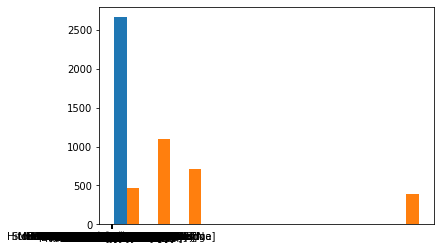

In [50]:
histogram_name_5km=d6[["Volcano_Name","population_within_5km"]]
plt.hist(histogram_name_5km)
plt.show()

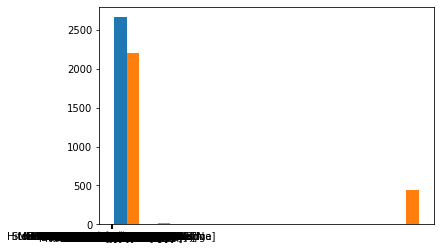

In [47]:
histogram_name_10km=d6[["Volcano_Name","population_within_10km"]]
plt.hist(histogram_name_10km)
plt.show()

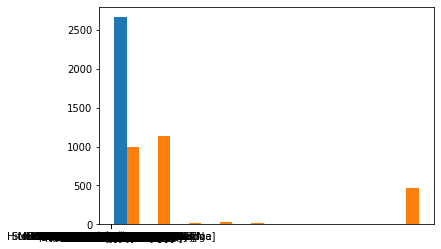

In [48]:
histogram_name_30km=d6[["Volcano_Name","population_within_30km"]]
plt.hist(histogram_name_30km)
plt.show()

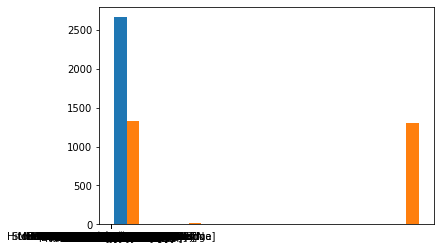

In [49]:
histogram_name_100km=d6[["Volcano_Name","population_within_100km"]]
plt.hist(histogram_name_100km)
plt.show()

In [51]:
newnumericaldata=[]
for i in d6.columns:
    if d6[i].dtypes!="object":
        newnumericaldata.append(i)
newnumericaldata   

['Latitude',
 'Longitude',
 'population_within_5km',
 'population_within_10km',
 'population_within_30km',
 'population_within_100km',
 'Summit by meter',
 'Elevatiuon by feat']

In [52]:
newobjectdata=[]
for i in d6.columns:
    if d6[i].dtypes=="object":
        newobjectdata.append(i)
newobjectdata  

['Volcano_Name',
 'Volcano_Type',
 'Country',
 'Region',
 'Subregion',
 'epoch_period',
 'Last_Eruption']

In [54]:
d6.mean()

C:\Users\UAS\AppData\Local\Temp/ipykernel_26316/2110256579.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d6.mean()


Latitude                   2.622013e+01
Longitude                  9.290740e+01
population_within_5km      1.015480e+04
population_within_10km     2.781227e+04
population_within_30km     3.826547e+05
population_within_100km    2.193842e+06
Summit by meter            2.120933e+03
Elevatiuon by feat         6.958467e+03
dtype: float64

In [53]:
d6=d6.replace(np.NAN,d6.mean()).head(15)
d6

C:\Users\UAS\AppData\Local\Temp/ipykernel_26316/705371612.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d6=d6.replace(np.NAN,d6.mean()).head(15)


,Volcano_Name,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km,Summit by meter,Elevatiuon by feat
0,Abu,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,34.500,131.600,3597.0,9594.0,117805.0,4071152.0,641.0,2103.0
1,Acamarachi,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,23.292,67.618,0.0,7.0,294.0,9092.0,6023.0,19760.0
2,Acatenango,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,14.501,90.876,4329.0,60730.0,1042836.0,7634778.0,3976.0,13045.0
3,Acigol-Nevsehir,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,38.537,34.621,127863.0,127863.0,218469.0,2253483.0,1683.0,5522.0
4,Adams,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,46.206,121.490,0.0,70.0,4019.0,393303.0,3742.0,12277.0
5,Adams Seamount,Submarine,Undersea Features,Hawaii and Pacific Ocean,Pacific Ocean (central),holocene,50 BCE,25.370,129.270,0.0,0.0,0.0,44.0,-39.0,-128.0
6,Adatarayama,Stratovolcano(es),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,1996 CE,37.647,140.281,428.0,3936.0,717078.0,5024654.0,1728.0,5669.0
7,Adwa,Stratovolcano,Ethiopia,Africa and Red Sea,Africa (northeastern) and Red Sea,holocene,Unknown - Evidence Credible,10.063,40.831,101.0,485.0,18645.0,1242922.0,1670.0,5479.0
8,Afdera,Stratovolcano,Ethiopia,Africa and Red Sea,Africa (northeastern) and Red Sea,holocene,Unknown - Evidence Uncertain,13.088,40.853,51.0,6042.0,8611.0,161009.0,1250.0,4101.0
9,Agrigan,Stratovolcano,United States,"Japan, Taiwan, Marianas","Izu, Volcano, and Mariana Islands",holocene,1917 CE,18.770,145.670,0.0,0.0,0.0,0.0,965.0,3166.0


In [55]:
d6.isnull().sum()

Volcano_Name               0
Volcano_Type               0
Country                    0
Region                     0
Subregion                  0
epoch_period               0
Last_Eruption              0
Latitude                   0
Longitude                  0
population_within_5km      0
population_within_10km     0
population_within_30km     0
population_within_100km    0
Summit by meter            0
Elevatiuon by feat         0
dtype: int64

<AxesSubplot:>

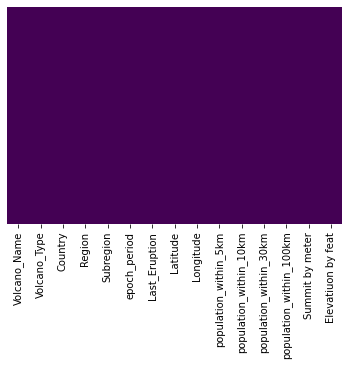

In [57]:
sns.heatmap(d6.isnull(),yticklabels=False,cbar=False,cmap="viridis")

array([[<AxesSubplot:title={'center':'population_within_5km'}>,
        <AxesSubplot:title={'center':'population_within_10km'}>],
       [<AxesSubplot:title={'center':'population_within_30km'}>,
        <AxesSubplot:title={'center':'population_within_100km'}>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

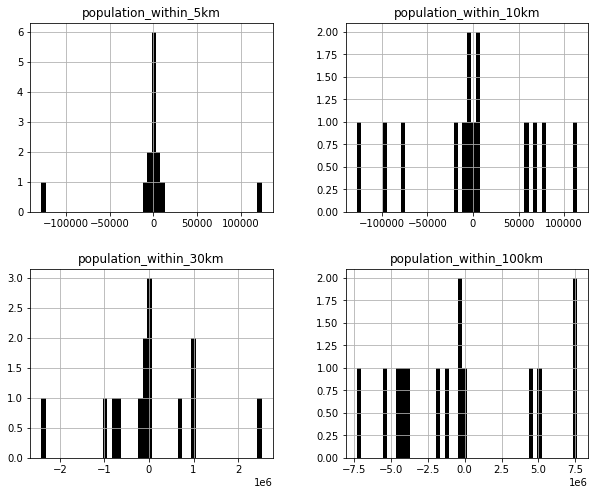

In [58]:
plt.figure()
d6[["population_within_5km","population_within_10km","population_within_30km","population_within_100km"]].diff().hist(color='k', bins=50,figsize=(10,8))

In [135]:
X=d6.drop(["population_within_5km"],axis=1)
#y=d6[["population_within_5km","population_within_10km","population_within_30km","population_within_100km"]]

y=d6.loc[:,["population_within_5km"]]
y=np.array(y).reshape(-1,1)

In [136]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.35,shuffle=True)
x_train

,Volcano_Name,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Latitude,Longitude,population_within_10km,population_within_30km,population_within_100km,Summit by meter,Elevatiuon by feat
0,Abu,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,34.500,131.600,9594.0,117805.0,4071152.0,641.0,2103.0
10,Agua,Stratovolcano,Guatemala,México and Central America,Guatemala,holocene,Unknown - Evidence Credible,14.465,90.743,114404.0,2530449.0,7441660.0,3760.0,12336.0
14,Ahyi,Submarine,United States,"Japan, Taiwan, Marianas","Izu, Volcano, and Mariana Islands",holocene,2014 CE,20.420,145.030,0.0,0.0,0.0,-75.0,-246.0
5,Adams Seamount,Submarine,Undersea Features,Hawaii and Pacific Ocean,Pacific Ocean (central),holocene,50 BCE,25.370,129.270,0.0,0.0,44.0,-39.0,-128.0
6,Adatarayama,Stratovolcano(es),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,1996 CE,37.647,140.281,3936.0,717078.0,5024654.0,1728.0,5669.0


In [137]:
cte=ce.TargetEncoder(cols=newobjectdata)
steps = [
        ('TargetEncoder', cte),
        ('scalar', StandardScaler()),
        ('model', LinearRegression()),
        
        ]
PipelineModellinear = Pipeline(steps)
PipelineModellinear.fit(x_train, y_train)

Pipeline(steps=[('TargetEncoder',
                 TargetEncoder(cols=['Volcano_Name', 'Volcano_Type', 'Country',
                                     'Region', 'Subregion', 'epoch_period',
                                     'Last_Eruption'])),
                ('scalar', StandardScaler()), ('model', LinearRegression())])

In [138]:
PipelineModellinear.score(x_train,y_train)

1.0

In [139]:
PipelineModellinear.score(x_test,y_test)

0.07976543468152175

In [140]:
y_pred=PipelineModellinear.predict(x_test)
y_pred

array([[-4226.81582121],
       [12563.36086834],
       [ 3818.62363419],
       [ 1903.08554768],
       [15166.3193834 ],
       [14539.24551406],
       [ 8305.0875585 ],
       [14619.55488347],
       [ 2016.14312093],
       [ 7629.8321592 ]])

In [141]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Absolute Error Value is : ', MAEValue)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  17177.44297241675
Mean Squared Error Value is :  1332887670.439576
